In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv('StudentPerformanceFactors.csv')

data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


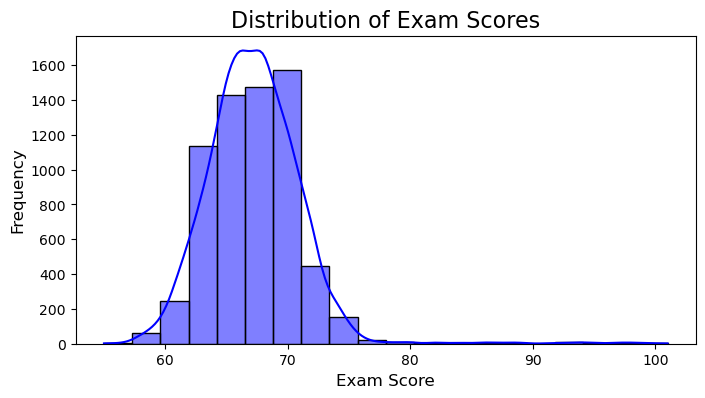

In [21]:
# Visualization 1: Distribution of Exam Scores
plt.figure(figsize=(8, 4))
sns.histplot(data['Exam_Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

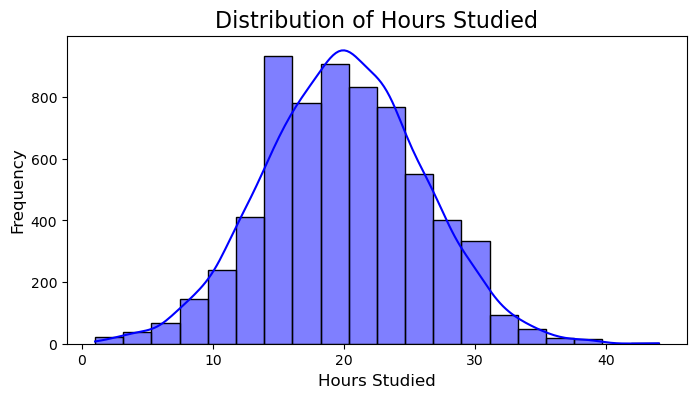

In [42]:
# Visualization 1: Distribution of Exam Scores
plt.figure(figsize=(8, 4))
sns.histplot(data['Hours_Studied'], kde=True, bins=20, color='blue')
plt.title('Distribution of Hours Studied', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

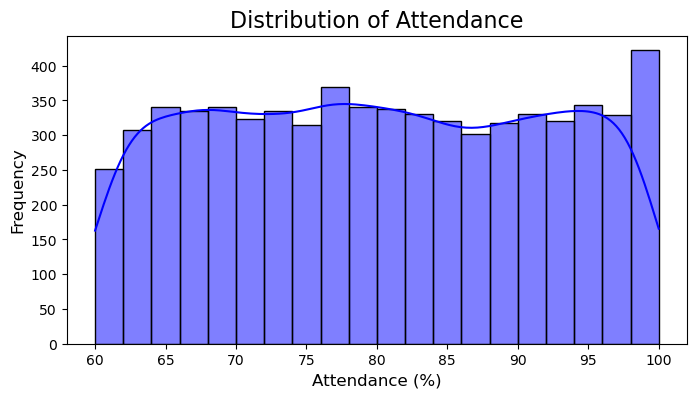

In [45]:
# Visualization 1: Distribution of Exam Scores
plt.figure(figsize=(8, 4))
sns.histplot(data['Attendance'], kde=True, bins=20, color='blue')
plt.title('Distribution of Attendance', fontsize=16)
plt.xlabel('Attendance (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

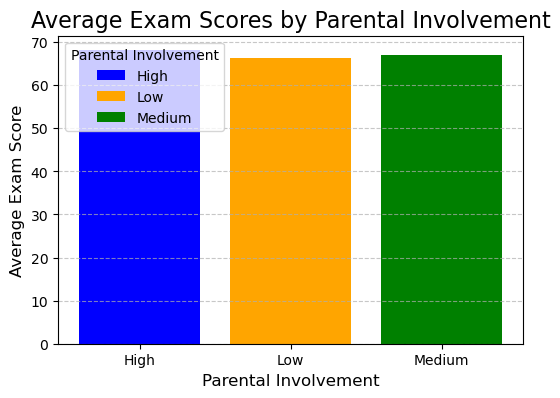

In [47]:
# here we will get some of visualizations based on the following:
# Group by 'Parental_Involvement' and calculate the average 'Exam_Score'
avg_scores = data.groupby('Parental_Involvement')['Exam_Score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_scores['Parental_Involvement'], avg_scores['Exam_Score'], 
               color=['blue', 'orange', 'green'], label=avg_scores['Parental_Involvement'])

plt.title('Average Exam Scores by Parental Involvement', fontsize=16)
plt.xlabel('Parental Involvement', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(bars, avg_scores['Parental_Involvement'], title="Parental Involvement", loc='upper left')

# Show the plot
plt.show()

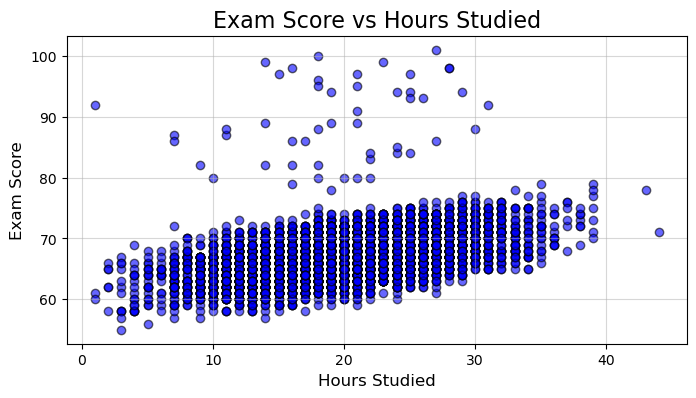

In [46]:
# Scatter plot of Exam Score vs Hours Studied
plt.figure(figsize=(8, 4))
plt.scatter(data['Hours_Studied'], data['Exam_Score'], color='blue', alpha=0.6, edgecolor='black')

# Plot customization
plt.title('Exam Score vs Hours Studied', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(alpha=0.5)


<Figure size 800x400 with 0 Axes>

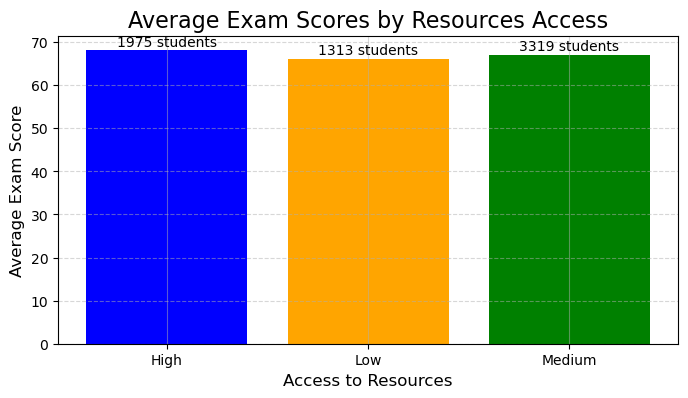

In [48]:
# Scatter plot of Exam Score vs Hours Studied
plt.figure(figsize=(8, 4))

# Group by 'Access_to_Resources' to calculate the average exam scores and counts
resource_stats = data.groupby('Access_to_Resources')['Exam_Score'].agg(['mean', 'count']).reset_index()

# Plot average exam scores
plt.figure(figsize=(8, 4))
bars = plt.bar(resource_stats['Access_to_Resources'], resource_stats['mean'], 
               color=['blue', 'orange', 'green'], label=resource_stats['Access_to_Resources'])

# Add student counts as annotations above the bars
for bar, count in zip(bars, resource_stats['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 1,  # Position above the bar
             f'{count} students',  # Annotation text
             ha='center', fontsize=10, color='black')

plt.title('Average Exam Scores by Resources Access', fontsize=16)
plt.xlabel('Access to Resources', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(alpha=0.5)

/var/folders/jb/1sj9kb_j2k7c0d477x84_4h40000gn/T/ipykernel_16164/707452293.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resource_counts = data.groupby(['Score_Range', 'Access_to_Resources']).size().unstack(fill_value=0)


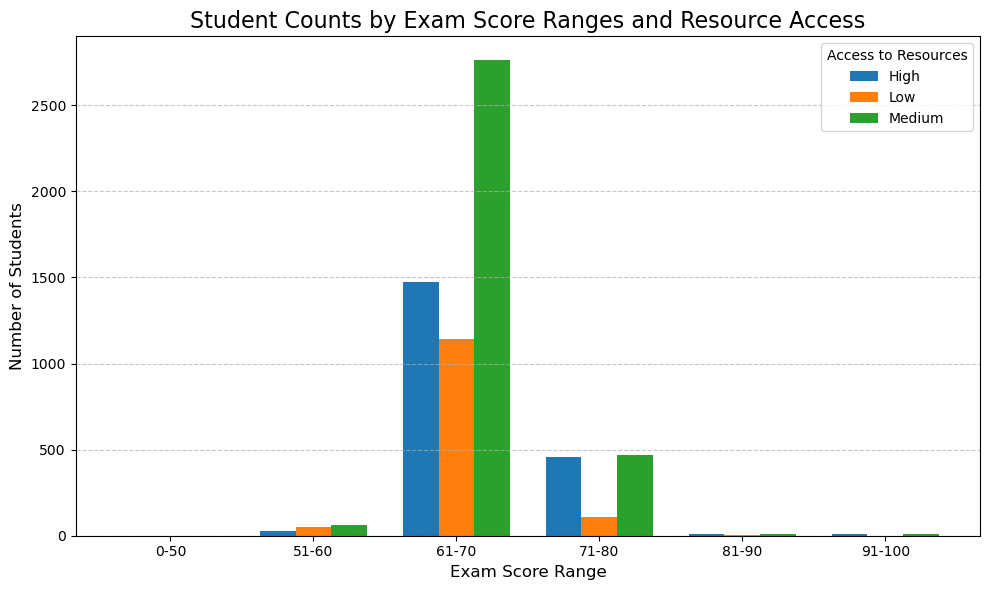

In [41]:
# Define bins for exam score ranges and assign labels
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['Score_Range'] = pd.cut(data['Exam_Score'], bins=bins, labels=labels)

# Group by Score_Range and Access_to_Resources to count students
resource_counts = data.groupby(['Score_Range', 'Access_to_Resources']).size().unstack(fill_value=0)

# Plotting
score_ranges = resource_counts.index
categories = resource_counts.columns

x = np.arange(len(score_ranges))  # Positions for score ranges
width = 0.25  # Width of the bars

plt.figure(figsize=(10, 6))
for i, category in enumerate(categories):
    plt.bar(x + i * width, resource_counts[category], width, label=category)

# Customization
plt.title('Student Counts by Exam Score Ranges and Resource Access', fontsize=16)
plt.xlabel('Exam Score Range', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(x + width, score_ranges, rotation=0)
plt.legend(title='Access to Resources')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/jb/1sj9kb_j2k7c0d477x84_4h40000gn/T/ipykernel_16164/2411345535.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_avg = data.groupby('Score_Range')['Attendance'].mean().reset_index()


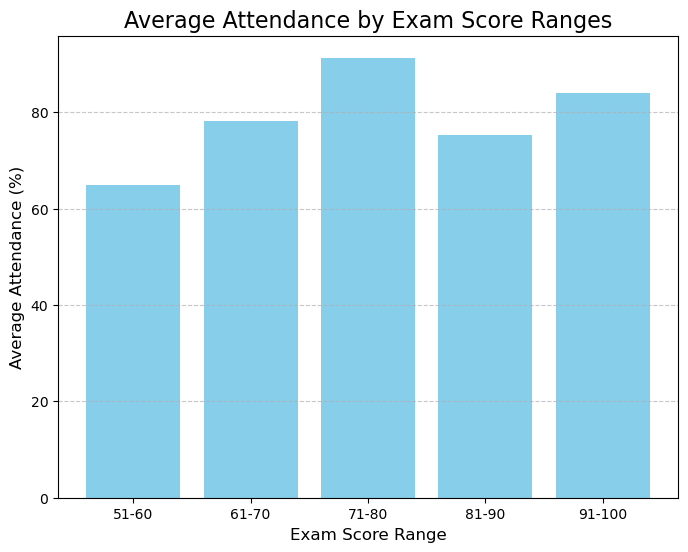

In [ ]:
# Define score ranges (bins) and labels for grouping
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['Score_Range'] = pd.cut(data['Exam_Score'], bins=bins, labels=labels)
tmp = data['Exam_Score'].sort_values()
# Group by score ranges and calculate the average attendance
attendance_avg = data.groupby('Score_Range')['Attendance'].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(attendance_avg['Score_Range'], attendance_avg['Attendance'], color='skyblue')

# Customizations
plt.title('Average Attendance by Exam Score Ranges', fontsize=16)
plt.xlabel('Exam Score Range', fontsize=12)
plt.ylabel('Average Attendance (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()